In [249]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import make_blobs
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import seaborn as sns

In [250]:
names = ["KNN","Random Forest", "svm"]
classifiers = [
    KNeighborsClassifier(5),
    RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'),
    SVC(kernel="linear", C=0.025)]

In [305]:
def Make_datasets():
    i = 1
    Moons = make_moons(n_samples=100, shuffle=True, random_state=None)
    df1 = pd.DataFrame(Moons[0],columns=['x'+str(i) for i in range(1,3)])
    Noise_moon = np.random.normal(0, 1,[100, 100])
    df_noise1 = (pd.DataFrame(Noise_moon, columns=['dim'+ str(i) for i in range(1,100+1)]))
    dataset_noise1 = (pd.concat([df1, df_noise1],axis = 1))
    X1 = dataset_noise1.iloc[:, :].values
    X11 = StandardScaler().fit_transform(X1)

    Classification = make_classification(n_samples = 100, n_features=10, n_redundant=0, n_informative=10, n_clusters_per_class=1, shuffle = True)
    df2 = pd.DataFrame(Classification[0],columns=['x'+str(i) for i in range(1,11)])
    Noise_class = np.random.normal(0, 0.1,[98, 98])
    df_noise2 = (pd.DataFrame(Noise_class, columns=['dim'+ str(i) for i in range(1,98+1)]))
    dataset_noise2 = (pd.concat([df2, df_noise2],axis = 1))
    X2 = dataset_noise1.iloc[:, :].values
    X12 = StandardScaler().fit_transform(X2)

    Blobs = make_blobs(n_samples=100, n_features=10, centers=4, cluster_std=1.0, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
    df3 = pd.DataFrame(Blobs[0],columns=['x'+str(i) for i in range(1,11)])
    Noise_blobs = np.random.normal(0, .1,[98, 98])
    df_noise3 = (pd.DataFrame(Noise_blobs, columns=['dim'+ str(i) for i in range(1,98+1)]))
    dataset_noise3 = (pd.concat([df3, df_noise3],axis = 1))
    X3 = dataset_noise1.iloc[:, :].values
    X13 = StandardScaler().fit_transform(X3)

    dataset = [X11, X12, X13]
    labels = [Moons[1], Classification[1], Blobs[1] ]
    
    return dataset, labels


ValueError: 'c' argument has 100 elements, which is not acceptable for use with 'x' with size 102, 'y' with size 102.

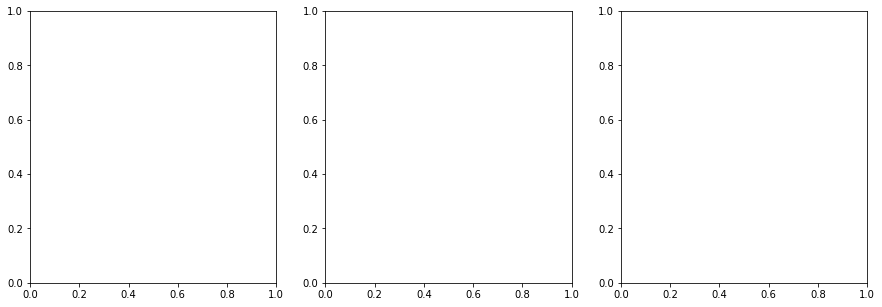

In [306]:
Xp, Yp = Make_datasets()
fig1, axs11 = plt.subplots(1, 3, figsize=((15,5)) )
(ax1, ax2, ax3) = axs11
ax1.scatter(Xp[0][0], Xp[0][1], c= Yp[0], edgecolors='k')
ax2.scatter(Xp[1][0], Xp[1][1], c= Yp[1], edgecolors='k')
ax3.scatter(Xp[2][0], Xp[2][1], c= Yp[2], edgecolors='k')

plt.tight_layout()
plt.show()

In [284]:
sim = 5
sim_acc = []
dim_knn = []
score_knn = []
dim_rf = []
score_rf = []
dim_svm = []
score_svm = []

dim_data1 =[]
dknn1 = [] 
drf1 = []
dsvm1 = []
sknn1 = [] 
srf1 = []
ssvm1 = []

dknn2 = [] 
drf2 = []
dsvm2 = []
sknn2 = [] 
srf2 = []
ssvm2 = []

dknn3 = [] 
drf3 = []
dsvm3 = []
sknn3 = [] 
srf3 = []
ssvm3 = []
dim_data2 =[]
dim_data3 =[]
score_data1 = []
score_data2 = []
score_data3 = []
i= 1
for i in range (sim):
    
    X1,Y1 = Make_datasets()
    #Each dataset
    dim_data = []
    score_data = []
    for X, Y in zip(X1,Y1):
        j = 1
        dim_rep = []
        score_rep = []
        
        #Each classifier
        for name, clf in zip(names, classifiers):
            #Each Dimensions
            for j in range (100 , 1 , -1):
                pca = PCA(n_components=j)
                principalComponents = pca.fit_transform(X)
                principalDf = pd.DataFrame(data = principalComponents
                             , columns = ['principal component'+str(i) for k in range(1,1+j)])
                principalDf['y'] = Y

                a = principalDf.iloc[:, :-1].values
                b = principalDf['y']
                X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=.4)

                clf.fit(X_train, y_train)
                score_dim = clf.score(X_test, y_test)
                score_rep.append(score_dim)
                dim_rep.append(j)
                
                
        dim_data += dim_rep
        score_data += score_rep

        dim_knn += dim_rep[0:99]
        score_knn += score_rep[0:99]
        
        dim_rf += dim_rep[99:198]
        score_rf += score_rep[99:198]
        
        dim_svm += dim_rep[198:297]
        score_svm += score_rep[198:297]
        
        
    dim_data1 += dim_data[0:297]
    score_data1 += score_data[0:297]
    dknn1 += dim_data1[(0 * (i+1)):(99 * (i+1))]
    sknn1 += score_data1[(0 * (i+1)):(99 * (i+1))] 
    drf1 += dim_data1[(99 * (i+1)):(198 * (i+1))]
    srf1 += score_data1[(99 * (i+1)):(198 * (i+1))] 
    dsvm1 += dim_data1[(198 * (i+1)):(297 * (i+1))]
    ssvm1 += score_data1[(198 * (i+1)):(297 * (i+1))]
    

    dim_data2 += dim_data[297:594]
    score_data2 += score_data[297:594]
    dknn2 += dim_data2[(0 * (i+1)):(99 * (i+1))]
    sknn2 += score_data2[(0 * (i+1)):(99 * (i+1))] 
    drf2 += dim_data2[(99 * (i+1)):(198 * (i+1))]
    srf2 += score_data2[(99 * (i+1)):(198 * (i+1))] 
    dsvm2 += dim_data2[(198 * (i+1)):(297 * (i+1))]
    ssvm2 += score_data2[(198 * (i+1)):(297 * (i+1))]
    
    dim_data3 += dim_data[594:891]
    score_data3 += score_data[594:891]
    dknn3 += dim_data3[(0 * (i+1)):(99 * (i+1))]
    sknn3 += score_data3[(0 * (i+1)):(99 * (i+1))] 
    drf3 += dim_data3[(99 * (i+1)):(198 * (i+1))]
    srf3 += score_data3[(99 * (i+1)):(198 * (i+1))] 
    dsvm3 += dim_data3[(198 * (i+1)):(297 * (i+1))]
    ssvm3 += score_data3[(198 * (i+1)):(297 * (i+1))]
    

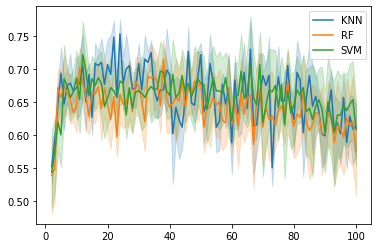

In [285]:
event=[]
for i in range(0,len(dknn1)):
    event.append('KNN')
for j in range(0,len(drf1)):
    event.append('RF')
for k in range(0,len(dsvm1)):
    event.append('SVM')
    
dims=np.concatenate((dknn1,drf1,dsvm1))
scores=np.concatenate((sknn1,srf1,ssvm1))

data={'Number of Noise Dimensions':dims,'Acc':scores,'Event':event}
sns.lineplot(x='Number of Noise Dimensions',y='Acc',hue='Event',data=data) 

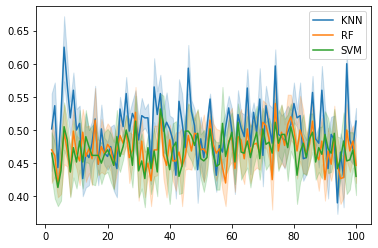

In [286]:
event2=[]
for i in range(0,len(dknn2)):
    event2.append('KNN')
for j in range(0,len(drf2)):
    event2.append('RF')
for k in range(0,len(dsvm2)):
    event2.append('SVM')
    
dims2=np.concatenate((dknn2,drf2,dsvm2))
scores2=np.concatenate((sknn2,srf2,ssvm2))

data2={'Number of Noise Dimensions':dims2,'Acc':scores2,'Event':event2}
sns.lineplot(x='Number of Noise Dimensions',y='Acc',hue='Event',data=data2) 

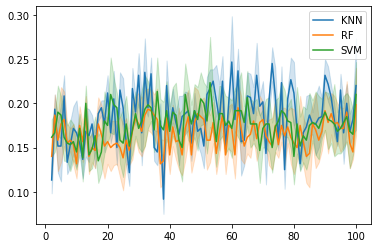

In [287]:
event3=[]
for i in range(0,len(dknn3)):
    event3.append('KNN')
for j in range(0,len(drf3)):
    event3.append('RF')
for k in range(0,len(dsvm3)):
    event3.append('SVM')
    
dims3=np.concatenate((dknn3,drf3,dsvm3))
scores3=np.concatenate((sknn3,srf3,ssvm3))

data3={'Number of Noise Dimensions':dims3,'Acc':scores3,'Event':event3}
sns.lineplot(x='Number of Noise Dimensions',y='Acc',hue='Event',data=data3) 

In [179]:
score_withoutdr = []
dim_withoutdr = []
score_without = []
Y1 = datasets[1]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y1, test_size=.4, random_state=42)
for name, clf in zip(names, classifiers):
    clf.fit(X_train1, y_train1)
    score_dim = clf.score(X_test1, y_test1)
    score_without.append(score_dim)
    Xaxis = []
    for j in range (100, 1, -1):
        Xaxis.append(j)
score_withoutdr = np.concatenate((score_withoutdr,score_without), axis = None)
dim_withoutdr = np.concatenate((dim_withoutdr,Xaxis), axis = None)

In [180]:
score_without

[0.45, 0.575, 0.6]